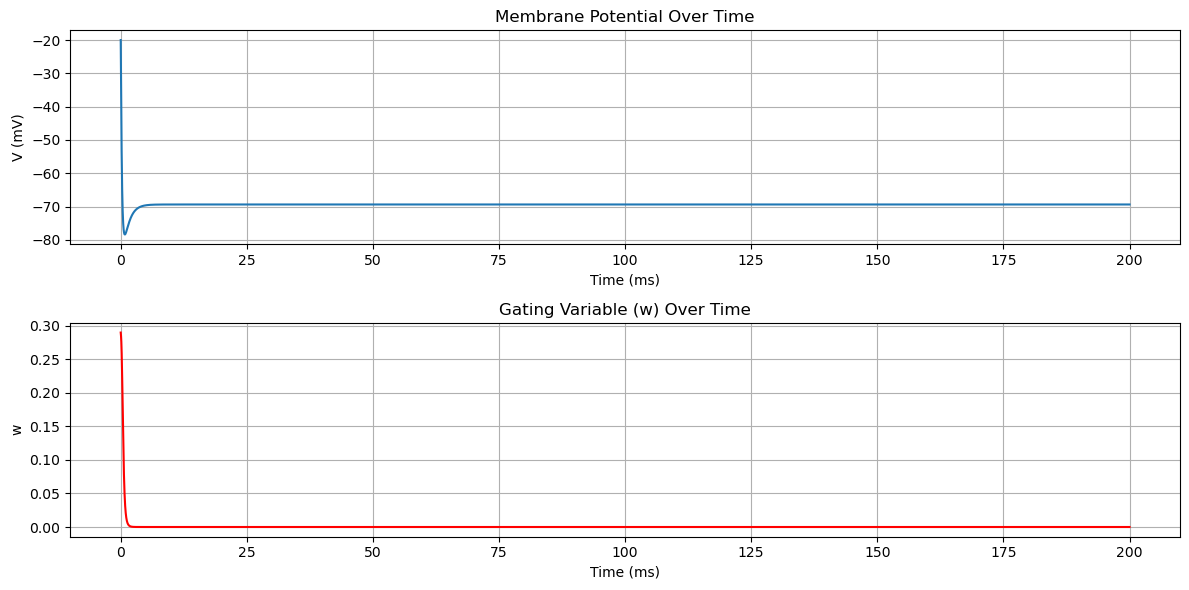

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def minf(V, bm, cm):
    return 0.5 * (1 + np.tanh((V - bm) / cm))

def winf(V, bw, cw):
    return 0.5 * (1 + np.tanh((V - bw) / cw))

def tauw(V, bw, cw):
    return 1 / np.cosh((V - bw) / (2 * cw))

def hodgkinHuxley(t, x, p):
    # Unpack parameters
    C, gfast, gslow, gleak, ENa, EK, Eleak, bm, cm, bw, cw, phiw, Istim = p
    
    # State variables
    V= x[0]
    w = x[1]
    
    # Compute derivatives
    dVdt = (Istim - gfast * minf(V, bm, cm) * (V - ENa) - gslow * w * (V - EK) - gleak * (V - Eleak)) / C
    dwdt = phiw * (winf(V, bw, cw) - w) / tauw(V, bw, cw)
    
    return np.array([dVdt, dwdt])

p = np.array([
    2,      # C
    20,     # gfast
    20,     # gslow
    2,      # gleak
    50,     # ENa
    -100,   # EK
    -70,    # Eleak
    -1.2,   # bm
    18,     # cm
    0,     # bw
    10,     # cw
    0.15,   # phiw
    0      # Istim
])

# Initial conditions
x0 = np.array([-20,0.29])
t0,tfin=0,200
delta_max=1e-2
# Solve the system using solve_ivp
solution = solve_ivp(
    hodgkinHuxley,                  # Function to integrate
    (t0, tfin),                     # Time interval (start, end)
    x0,                             # Initial conditions
    args=(p,),                       # Additional parameters to pass to hodgkinHuxley function
    max_step=1e-2,                  # Maximum step size
    dense_output=True               # Get continuous solution
)

# Extract solution
t_values = solution.t
V_values, w_values = solution.y

# Plot the results
plt.figure(figsize=(12, 6))

# Plot V (membrane potential) over time
plt.subplot(2, 1, 1)
plt.plot(t_values, V_values, label="V (membrane potential)")
plt.xlabel("Time (ms)")
plt.ylabel("V (mV)")
plt.title("Membrane Potential Over Time")
plt.grid(True)

# Plot w (gating variable) over time
plt.subplot(2, 1, 2)
plt.plot(t_values, w_values, label="w (gating variable)", color='r')
plt.xlabel("Time (ms)")
plt.ylabel("w")
plt.title("Gating Variable (w) Over Time")
plt.grid(True)

plt.tight_layout()
plt.show()